In [1]:
import pandas as pd
import geopandas
import matplotlib.pyplot as plt

In [2]:
!pip install matplotlib

In [3]:
!pip install descartes

In [4]:
data =  pd.read_csv("Tartu_April_2019_UT_students.csv", sep=',')
linnaosad= geopandas.read_file("Linnaosad.shp")

In [5]:
data.head()

,Unnamed: 0,pickup_lat,pickup_lng,destination_lat,destination_lng,real_destination_lat,real_destination_lng,finished,created,home_address_lat,home_address_lng,work_address_lat,work_address_lng,new_id
0,0,58.390,26.727,58.378,26.711,58.378,26.711,1,2019-04-13 21:00:19,59.428,24.740,NaN,NaN,0
1,1,58.384,26.720,58.399,26.717,58.399,26.716,1,2019-04-02 22:05:44,58.399,26.717,NaN,NaN,1
2,2,58.349,26.793,58.375,26.692,58.375,26.692,1,2019-04-07 05:38:55,58.228,26.398,58.228,26.40,2
3,3,58.382,26.729,58.374,26.758,58.374,26.758,1,2019-04-22 18:41:55,NaN,NaN,NaN,NaN,3
4,4,58.384,26.757,58.378,26.685,58.378,26.685,1,2019-04-30 06:39:34,58.384,26.757,58.359,26.67,4


In [6]:
linnaosad.crs #check coordinate system

<Projected CRS: EPSG:3301>
Name: Estonian Coordinate System of 1997
Axis Info [cartesian]:
- X[north]: Northing (metre)
- Y[east]: Easting (metre)
Area of Use:
- name: Estonia
- bounds: (20.37, 57.52, 28.2, 60.0)
Coordinate Operation:
- name: Estonian National Grid
- method: Lambert Conic Conformal (2SP)
Datum: Estonia 1997
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [7]:
#select home address coordinates
gdf_home = geopandas.GeoDataFrame(data, geometry=geopandas.points_from_xy(data.home_address_lng, data.home_address_lat)) 

In [8]:
gdf_home.shape

(65102, 15)

In [9]:
#convert Bolt data coordinates to match with Tartu map coordinate system
gdf_home.set_crs(epsg=4326, inplace=True)
gdf_home = gdf_home.to_crs(epsg=3301)

In [10]:
gdf_home.crs #check coordinate system

<Projected CRS: EPSG:3301>
Name: Estonian Coordinate System of 1997
Axis Info [cartesian]:
- X[north]: Northing (metre)
- Y[east]: Easting (metre)
Area of Use:
- name: Estonia
- bounds: (20.37, 57.52, 28.2, 60.0)
Coordinate Operation:
- name: Estonian National Grid
- method: Lambert Conic Conformal (2SP)
Datum: Estonia 1997
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [11]:
#join Bolt data with map data
join_home = geopandas.sjoin(gdf_home, linnaosad, how="left", op="within")

In [12]:
join_home.shape

(65102, 19)

In [13]:
join_home.head()

,Unnamed: 0,pickup_lat,pickup_lng,destination_lat,destination_lng,real_destination_lat,real_destination_lng,finished,created,home_address_lat,home_address_lng,work_address_lat,work_address_lng,new_id,geometry,index_right,NIMI,Shape_STAr,Shape_STLe
0,0,58.390,26.727,58.378,26.711,58.378,26.711,1,2019-04-13 21:00:19,59.428,24.740,NaN,NaN,0,POINT (542002.724 6588025.099),NaN,NaN,NaN,NaN
1,1,58.384,26.720,58.399,26.717,58.399,26.716,1,2019-04-02 22:05:44,58.399,26.717,NaN,NaN,1,POINT (658820.497 6476391.525),12.0,Raadi-Kruusamäe,2.827524e+06,8532.610052
2,2,58.349,26.793,58.375,26.692,58.375,26.692,1,2019-04-07 05:38:55,58.228,26.398,58.228,26.40,2,POINT (640862.761 6456647.104),NaN,NaN,NaN,NaN
3,3,58.382,26.729,58.374,26.758,58.374,26.758,1,2019-04-22 18:41:55,NaN,NaN,NaN,NaN,3,POINT (nan nan),NaN,NaN,NaN,NaN
4,4,58.384,26.757,58.378,26.685,58.378,26.685,1,2019-04-30 06:39:34,58.384,26.757,58.359,26.67,4,POINT (661226.013 6474817.668),13.0,Jaamamõisa,1.499794e+06,5455.636873


In [14]:
#drop excess columns and leave only home district name (reamed from NIMI) to the main dataframe
data = join_home.drop(columns=["geometry", "index_right", "Shape_STAr", "Shape_STLe"])
data = data.rename(columns={"NIMI": "home_district"})
data.head()

,Unnamed: 0,pickup_lat,pickup_lng,destination_lat,destination_lng,real_destination_lat,real_destination_lng,finished,created,home_address_lat,home_address_lng,work_address_lat,work_address_lng,new_id,home_district
0,0,58.390,26.727,58.378,26.711,58.378,26.711,1,2019-04-13 21:00:19,59.428,24.740,NaN,NaN,0,NaN
1,1,58.384,26.720,58.399,26.717,58.399,26.716,1,2019-04-02 22:05:44,58.399,26.717,NaN,NaN,1,Raadi-Kruusamäe
2,2,58.349,26.793,58.375,26.692,58.375,26.692,1,2019-04-07 05:38:55,58.228,26.398,58.228,26.40,2,NaN
3,3,58.382,26.729,58.374,26.758,58.374,26.758,1,2019-04-22 18:41:55,NaN,NaN,NaN,NaN,3,NaN
4,4,58.384,26.757,58.378,26.685,58.378,26.685,1,2019-04-30 06:39:34,58.384,26.757,58.359,26.67,4,Jaamamõisa


In [15]:
#repeat above 3 times to add pickup, real_destination and work address district info to the main dataframe

#add pickup district
gdf_pickup = geopandas.GeoDataFrame(data, geometry=geopandas.points_from_xy(data.pickup_lng, data.pickup_lat)) 
gdf_pickup.set_crs(epsg=4326, inplace=True)
gdf_pickup = gdf_pickup.to_crs(epsg=3301)
join_pickup = geopandas.sjoin(gdf_pickup, linnaosad, how="left", op="within")
data = join_pickup.drop(columns=["geometry", "index_right", "Shape_STAr", "Shape_STLe"])
data = data.rename(columns={"NIMI": "pickup_district"})

#add real_destination district
gdf_dest = geopandas.GeoDataFrame(data, geometry=geopandas.points_from_xy(data.real_destination_lng, data.real_destination_lat)) 
gdf_dest.set_crs(epsg=4326, inplace=True)
gdf_dest = gdf_dest.to_crs(epsg=3301)
join_dest = geopandas.sjoin(gdf_dest, linnaosad, how="left", op="within")
data = join_dest.drop(columns=["geometry", "index_right", "Shape_STAr", "Shape_STLe"])
data = data.rename(columns={"NIMI": "destination_district"})

#add work address district
gdf_work = geopandas.GeoDataFrame(data, geometry=geopandas.points_from_xy(data.work_address_lng, data.work_address_lat)) 
gdf_work.set_crs(epsg=4326, inplace=True)
gdf_work = gdf_work.to_crs(epsg=3301)
join_work = geopandas.sjoin(gdf_work, linnaosad, how="left", op="within")
data = join_work.drop(columns=["geometry", "index_right", "Shape_STAr", "Shape_STLe"])
data = data.rename(columns={"NIMI": "work_district"})

data.head()

,Unnamed: 0,pickup_lat,pickup_lng,destination_lat,destination_lng,real_destination_lat,real_destination_lng,finished,created,home_address_lat,home_address_lng,work_address_lat,work_address_lng,new_id,home_district,pickup_district,destination_district,work_district
0,0,58.390,26.727,58.378,26.711,58.378,26.711,1,2019-04-13 21:00:19,59.428,24.740,NaN,NaN,0,NaN,Ülejõe,Kesklinna,NaN
1,1,58.384,26.720,58.399,26.717,58.399,26.716,1,2019-04-02 22:05:44,58.399,26.717,NaN,NaN,1,Raadi-Kruusamäe,Kesklinna,Raadi-Kruusamäe,NaN
2,2,58.349,26.793,58.375,26.692,58.375,26.692,1,2019-04-07 05:38:55,58.228,26.398,58.228,26.40,2,NaN,NaN,Veeriku,NaN
3,3,58.382,26.729,58.374,26.758,58.374,26.758,1,2019-04-22 18:41:55,NaN,NaN,NaN,NaN,3,NaN,Ülejõe,Annelinna,NaN
4,4,58.384,26.757,58.378,26.685,58.378,26.685,1,2019-04-30 06:39:34,58.384,26.757,58.359,26.67,4,Jaamamõisa,Jaamamõisa,Veeriku,NaN


In [16]:
data.shape

(65102, 18)

In [17]:
data.to_csv("Bolt_data_districts.csv")

In [18]:
data.count()

Unnamed: 0              65102
pickup_lat              65102
pickup_lng              65102
destination_lat         65074
destination_lng         65071
real_destination_lat    58521
real_destination_lng    58521
finished                65102
created                 65102
home_address_lat        38682
home_address_lng        38682
work_address_lat        22588
work_address_lng        22588
new_id                  65102
home_district           27296
pickup_district         60152
destination_district    53047
work_district           16578
dtype: int64

<AxesSubplot:>

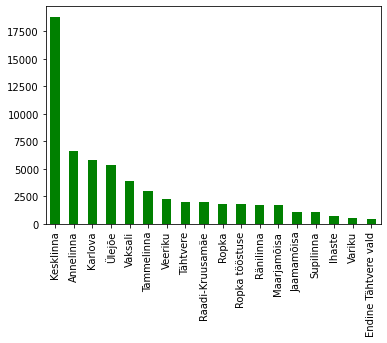

In [208]:
# pickup district distribution
data["pickup_district"].value_counts().plot(kind="bar", color="green")

<AxesSubplot:>

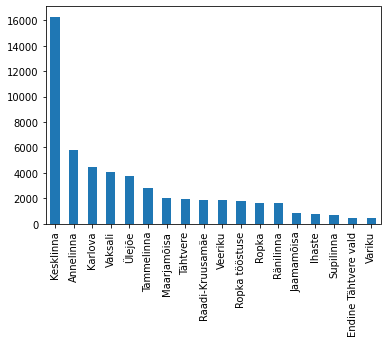

In [20]:
# destination district distribution
data["destination_district"].value_counts().plot(kind="bar")

In [21]:
# extract weekday
data["weekday"] = pd.Categorical(pd.to_datetime(data.created).dt.weekday, ordered=True)

In [22]:
data["weekday"].cat.categories = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

In [23]:
data.head()

,Unnamed: 0,pickup_lat,pickup_lng,destination_lat,destination_lng,real_destination_lat,real_destination_lng,finished,created,home_address_lat,home_address_lng,work_address_lat,work_address_lng,new_id,home_district,pickup_district,destination_district,work_district,weekday
0,0,58.390,26.727,58.378,26.711,58.378,26.711,1,2019-04-13 21:00:19,59.428,24.740,NaN,NaN,0,NaN,Ülejõe,Kesklinna,NaN,Saturday
1,1,58.384,26.720,58.399,26.717,58.399,26.716,1,2019-04-02 22:05:44,58.399,26.717,NaN,NaN,1,Raadi-Kruusamäe,Kesklinna,Raadi-Kruusamäe,NaN,Tuesday
2,2,58.349,26.793,58.375,26.692,58.375,26.692,1,2019-04-07 05:38:55,58.228,26.398,58.228,26.40,2,NaN,NaN,Veeriku,NaN,Sunday
3,3,58.382,26.729,58.374,26.758,58.374,26.758,1,2019-04-22 18:41:55,NaN,NaN,NaN,NaN,3,NaN,Ülejõe,Annelinna,NaN,Monday
4,4,58.384,26.757,58.378,26.685,58.378,26.685,1,2019-04-30 06:39:34,58.384,26.757,58.359,26.67,4,Jaamamõisa,Jaamamõisa,Veeriku,NaN,Tuesday


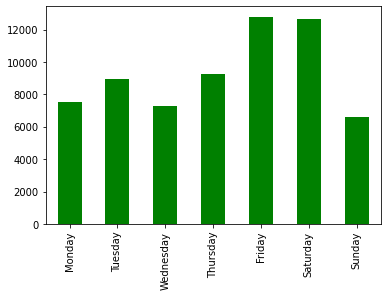

In [213]:
# weekday distribution
data["weekday"].value_counts().sort_index().plot(kind="bar", color="green")
plt.title=("Rides' Weekly Distribution")
plt.show()

In [25]:
# extract time window
data["time_window"] = pd.Categorical(pd.to_datetime(data.created).dt.hour, ordered=True)

In [26]:
data.head()

,Unnamed: 0,pickup_lat,pickup_lng,destination_lat,destination_lng,real_destination_lat,real_destination_lng,finished,created,home_address_lat,home_address_lng,work_address_lat,work_address_lng,new_id,home_district,pickup_district,destination_district,work_district,weekday,time_window
0,0,58.390,26.727,58.378,26.711,58.378,26.711,1,2019-04-13 21:00:19,59.428,24.740,NaN,NaN,0,NaN,Ülejõe,Kesklinna,NaN,Saturday,21
1,1,58.384,26.720,58.399,26.717,58.399,26.716,1,2019-04-02 22:05:44,58.399,26.717,NaN,NaN,1,Raadi-Kruusamäe,Kesklinna,Raadi-Kruusamäe,NaN,Tuesday,22
2,2,58.349,26.793,58.375,26.692,58.375,26.692,1,2019-04-07 05:38:55,58.228,26.398,58.228,26.40,2,NaN,NaN,Veeriku,NaN,Sunday,5
3,3,58.382,26.729,58.374,26.758,58.374,26.758,1,2019-04-22 18:41:55,NaN,NaN,NaN,NaN,3,NaN,Ülejõe,Annelinna,NaN,Monday,18
4,4,58.384,26.757,58.378,26.685,58.378,26.685,1,2019-04-30 06:39:34,58.384,26.757,58.359,26.67,4,Jaamamõisa,Jaamamõisa,Veeriku,NaN,Tuesday,6


<AxesSubplot:>

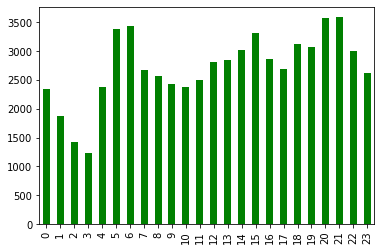

In [214]:
# daily time distribution
data["time_window"].value_counts().sort_index().plot(kind="bar", color="green")

<AxesSubplot:>

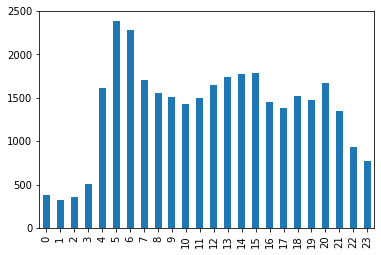

In [28]:
# extract Monday-Thursday data
mon_thu = ["Monday", "Tuesday", "Wednesday", "Thursday"]
data_mon_thu = data[data.weekday.isin(mon_thu)]
data_mon_thu["time_window"].value_counts().sort_index().plot(kind="bar")

<AxesSubplot:>

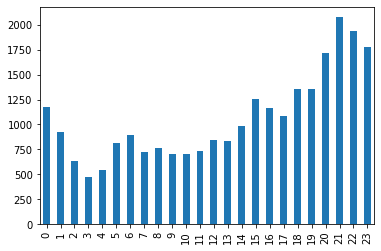

In [29]:
# extract Friday-Saturday
fri_sat = ["Friday", "Saturday"]
data_fri_sat = data[data.weekday.isin(fri_sat)]
data_fri_sat["time_window"].value_counts().sort_index().plot(kind="bar")

<AxesSubplot:>

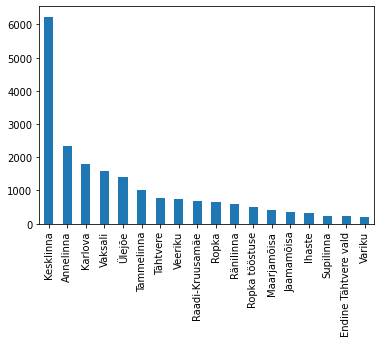

In [30]:
data_fri_sat["destination_district"].value_counts().plot(kind="bar")

<AxesSubplot:>

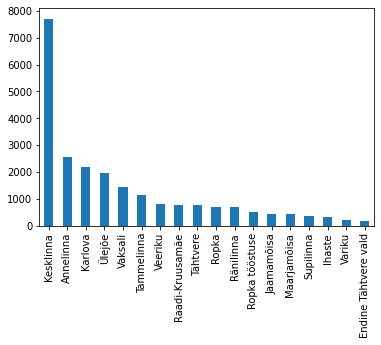

In [31]:
data_fri_sat["pickup_district"].value_counts().plot(kind="bar")

In [32]:
#count how many times a user has been at scpecific coordinates, taking into account both pickup and real destination coordinates

# select by ID pickup coordinates
id_pickup = data[["new_id", "pickup_lat", "pickup_lng"]]

In [33]:
# select by ID real destination coordinates
id_destination = data[["new_id","real_destination_lat", "real_destination_lng"]]

In [34]:
# rename pickup coordinates 
id_pickup = id_pickup.rename(columns={"pickup_lat": "lat", "pickup_lng": "lng"}, errors="raise")

In [35]:
id_destination = id_destination.rename(columns={"real_destination_lat": "lat", "real_destination_lng": "lng"}, errors="raise")

In [36]:
# merge together
id_data = pd.concat([id_pickup, id_destination])

In [37]:
# drop missing values
id_data = id_data.dropna()

In [38]:
#count by unique users
id_data_count = id_data.groupby(by=["new_id", "lat", "lng"], as_index=False).size()

In [39]:
id_data_count = id_data_count.rename(columns={"size": "visit_count"})

In [40]:
# join visit_count with data to predict if destination is home or not
data = data.join(id_data_count.set_index(["new_id", "lat", "lng"]), on=["new_id", "real_destination_lat", "real_destination_lng"])

In [41]:
data = data.rename(columns={"visit_count": "visit_count_destination"})
data.columns

Index(['Unnamed: 0', 'pickup_lat', 'pickup_lng', 'destination_lat',
       'destination_lng', 'real_destination_lat', 'real_destination_lng',
       'finished', 'created', 'home_address_lat', 'home_address_lng',
       'work_address_lat', 'work_address_lng', 'new_id', 'home_district',
       'pickup_district', 'destination_district', 'work_district', 'weekday',
       'time_window', 'visit_count_destination'],
      dtype='object')

In [42]:
# join visit_count with data to predict if pickup is home or not
data = data.join(id_data_count.set_index(["new_id", "lat", "lng"]), on=["new_id", "pickup_lat", "pickup_lng"])

In [43]:
data = data.rename(columns={"visit_count": "visit_count_pickup"})
data.columns

Index(['Unnamed: 0', 'pickup_lat', 'pickup_lng', 'destination_lat',
       'destination_lng', 'real_destination_lat', 'real_destination_lng',
       'finished', 'created', 'home_address_lat', 'home_address_lng',
       'work_address_lat', 'work_address_lng', 'new_id', 'home_district',
       'pickup_district', 'destination_district', 'work_district', 'weekday',
       'time_window', 'visit_count_destination', 'visit_count_pickup'],
      dtype='object')

In [44]:
import numpy as np

In [45]:
# create y column with Nan values
data["y_pickup"] = np.nan

In [46]:
# create y column with Nan values
data["y_destination"] = np.nan

In [47]:
# Destination: assign y value 1 to rides ending at home
data.loc[(data["real_destination_lat"] == data["home_address_lat"]) & (data["real_destination_lng"] == data["home_address_lng"]),"y_destination"]=1

In [48]:
# Pickup: assign y value 1 to rides starting from home
data.loc[(data["pickup_lat"] == data["home_address_lat"]) & (data["pickup_lng"] == data["home_address_lng"]),"y_pickup"]=1

In [49]:
data.count()

Unnamed: 0                 65102
pickup_lat                 65102
pickup_lng                 65102
destination_lat            65074
destination_lng            65071
real_destination_lat       58521
real_destination_lng       58521
finished                   65102
created                    65102
home_address_lat           38682
home_address_lng           38682
work_address_lat           22588
work_address_lng           22588
new_id                     65102
home_district              27296
pickup_district            60152
destination_district       53047
work_district              16578
weekday                    65102
time_window                65102
visit_count_destination    58521
visit_count_pickup         65102
y_pickup                    6903
y_destination               3878
dtype: int64

In [50]:
# Destination: assign y value 0 to rides ending at work
data.loc[(data["real_destination_lat"] == data["work_address_lat"]) & (data["real_destination_lng"] == data["work_address_lng"]),"y_destination"]=0

In [51]:
# Pickup: assign y value 0 to rides starting from work
data.loc[(data["pickup_lat"] == data["work_address_lat"]) & (data["pickup_lng"] == data["work_address_lng"]),"y_pickup"]=0

In [52]:
data.count()

Unnamed: 0                 65102
pickup_lat                 65102
pickup_lng                 65102
destination_lat            65074
destination_lng            65071
real_destination_lat       58521
real_destination_lng       58521
finished                   65102
created                    65102
home_address_lat           38682
home_address_lng           38682
work_address_lat           22588
work_address_lng           22588
new_id                     65102
home_district              27296
pickup_district            60152
destination_district       53047
work_district              16578
weekday                    65102
time_window                65102
visit_count_destination    58521
visit_count_pickup         65102
y_pickup                    7072
y_destination               4043
dtype: int64

In [53]:
# Destination: assign y value 0 to rides which start from home
data.loc[(data["pickup_lat"] == data["home_address_lat"]) & (data["pickup_lng"] == data["home_address_lng"]), "y_destination"]=0

In [54]:
# Pickup: assign y value 0 to rides which end at home
data.loc[(data["real_destination_lat"] == data["home_address_lat"]) & (data["real_destination_lng"] == data["home_address_lng"]), "y_pickup"]=0

In [55]:
data.count()

Unnamed: 0                 65102
pickup_lat                 65102
pickup_lng                 65102
destination_lat            65074
destination_lng            65071
real_destination_lat       58521
real_destination_lng       58521
finished                   65102
created                    65102
home_address_lat           38682
home_address_lng           38682
work_address_lat           22588
work_address_lng           22588
new_id                     65102
home_district              27296
pickup_district            60152
destination_district       53047
work_district              16578
weekday                    65102
time_window                65102
visit_count_destination    58521
visit_count_pickup         65102
y_pickup                   10891
y_destination              10852
dtype: int64

In [56]:
# Destination: assign y value 0 to rides which have home address coordinates and which do not end at home - it also overwrites the previous
data.loc[data["home_district"].notna() & (data["destination_lng"] != data["home_address_lng"]), "y_destination"]=0

In [57]:
# Pickup: assign y value 0 to rides which have home address coordinates and which do not start at home - it also overwrites the previous
data.loc[data["home_district"].notna() & (data["pickup_lng"] != data["home_address_lng"]), "y_pickup"]=0

In [58]:
data.count()

Unnamed: 0                 65102
pickup_lat                 65102
pickup_lng                 65102
destination_lat            65074
destination_lng            65071
real_destination_lat       58521
real_destination_lng       58521
finished                   65102
created                    65102
home_address_lat           38682
home_address_lng           38682
work_address_lat           22588
work_address_lng           22588
new_id                     65102
home_district              27296
pickup_district            60152
destination_district       53047
work_district              16578
weekday                    65102
time_window                65102
visit_count_destination    58521
visit_count_pickup         65102
y_pickup                   27819
y_destination              24726
dtype: int64

In [59]:
#DEstination: create train-test dataset from rides with y value
dataset_dest = data.dropna(subset=["y_destination"])

In [60]:
#Pickup: create train-test dataset from rides with y value
dataset_pick = data.dropna(subset=["y_pickup"])

In [61]:
dataset_dest

,Unnamed: 0,pickup_lat,pickup_lng,destination_lat,destination_lng,real_destination_lat,real_destination_lng,finished,created,home_address_lat,...,home_district,pickup_district,destination_district,work_district,weekday,time_window,visit_count_destination,visit_count_pickup,y_pickup,y_destination
4,4,58.384,26.757,58.378,26.685,58.378,26.685,1,2019-04-30 06:39:34,58.384,...,Jaamamõisa,Jaamamõisa,Veeriku,NaN,Tuesday,6,1.0,15,1.0,0.0
5,5,58.356,26.721,58.360,26.731,NaN,NaN,0,2019-04-30 18:34:23,58.354,...,Ropka,Ropka,NaN,NaN,Tuesday,18,NaN,2,0.0,0.0
7,7,58.382,26.722,58.374,26.716,58.375,26.718,1,2019-04-19 23:45:36,58.357,...,Ropka,Kesklinna,Kesklinna,Ropka,Friday,23,15.0,2,0.0,0.0
14,14,58.334,26.708,58.380,26.744,58.380,26.744,1,2019-04-04 21:28:57,58.380,...,Annelinna,NaN,Annelinna,NaN,Thursday,21,1.0,2,0.0,1.0
19,19,58.383,26.736,58.369,26.772,58.369,26.773,1,2019-04-09 13:09:49,58.371,...,Annelinna,Ülejõe,Annelinna,NaN,Tuesday,13,2.0,17,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65089,65089,58.378,26.709,58.373,26.750,NaN,NaN,0,2019-04-01 04:44:14,58.378,...,Vaksali,Vaksali,NaN,Annelinna,Monday,4,NaN,40,1.0,0.0
65090,65090,58.384,26.728,58.396,26.716,58.396,26.713,1,2019-04-04 04:50:38,58.384,...,Ülejõe,Ülejõe,Raadi-Kruusamäe,Raadi-Kruusamäe,Thursday,4,6.0,7,0.0,0.0
65097,65097,58.346,26.726,58.369,26.718,58.369,26.717,1,2019-04-07 07:46:36,58.346,...,Ropka tööstuse,Ropka tööstuse,Vaksali,NaN,Sunday,7,1.0,2,1.0,0.0
65098,65098,58.361,26.698,58.377,26.725,58.377,26.725,1,2019-04-13 07:02:47,58.361,...,Tammelinna,Tammelinna,Kesklinna,Kesklinna,Saturday,7,5.0,36,1.0,0.0


In [62]:
# Destination: separate features and label
dataset_dest_X = dataset_dest[["destination_district", "pickup_district", "weekday", "time_window", "visit_count_destination", "visit_count_pickup"]]
dataset_dest_Y = dataset_dest["y_destination"]

In [63]:
# Pickup: separate features and label
dataset_pick_X = dataset_pick[["destination_district", "pickup_district", "weekday", "time_window", "visit_count_destination", "visit_count_pickup"]]
dataset_pick_Y = dataset_pick["y_pickup"]

In [64]:
# Destination: one-hot coding
dataset_dest_X = pd.get_dummies(dataset_dest_X, columns=["destination_district", "pickup_district","weekday", "time_window"])

In [65]:
# Pickup: one-hot coding
dataset_pick_X = pd.get_dummies(dataset_pick_X, columns=["destination_district", "pickup_district","weekday", "time_window"])

In [66]:
# Destination: replace NaN with 0
dataset_dest_X = dataset_dest_X.fillna(0)

In [67]:
# Pickup: replace NaN with 0
dataset_pick_X = dataset_pick_X.fillna(0)

In [68]:
from sklearn.model_selection import train_test_split

#Destination:train-test-split
X_train_dest, X_test_dest, y_train_dest, y_test_dest = train_test_split(dataset_dest_X, dataset_dest_Y, test_size=0.2, random_state=0)   
print(X_train_dest.shape, X_test_dest.shape, y_train_dest.shape, y_test_dest.shape) 

(19780, 69) (4946, 69) (19780,) (4946,)


In [69]:
#Pickup: train-test-split
X_train_pick, X_test_pick, y_train_pick, y_test_pick = train_test_split(dataset_pick_X, dataset_pick_Y, test_size=0.2, random_state=0)   
print(X_train_pick.shape, X_test_pick.shape, y_train_pick.shape, y_test_pick.shape) 

(22255, 69) (5564, 69) (22255,) (5564,)


In [70]:
from sklearn.ensemble import RandomForestClassifier

rfc_dest = RandomForestClassifier().fit(X_train_dest, y_train_dest)
rfc_pick = RandomForestClassifier().fit(X_train_pick, y_train_pick)

In [71]:
rfc_dest_result = rfc_dest.predict(X_test_dest)
rfc_pick_result = rfc_pick.predict(X_test_pick)

In [72]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test_dest, rfc_dest_result)

0.8843509906995553

In [73]:
accuracy_score(y_test_pick, rfc_pick_result)

0.8215312724658519

In [74]:
from sklearn.ensemble import ExtraTreesClassifier
#Destination
etc_dest = ExtraTreesClassifier().fit(X_train_dest, y_train_dest)
etc_dest_result = etc_dest.predict(X_test_dest)
accuracy_score(y_test_dest, etc_dest_result)

0.8732308936514355

In [75]:
#Pickup
etc_pick = ExtraTreesClassifier().fit(X_train_pick, y_train_pick)
etc_pick_result = etc_pick.predict(X_test_pick)
accuracy_score(y_test_pick, etc_pick_result)

0.8010424155283968

In [76]:
from sklearn.ensemble import GradientBoostingClassifier
#Destination
gbc_dest = GradientBoostingClassifier().fit(X_train_dest, y_train_dest)
gbc_dest_result = gbc_dest.predict(X_test_dest)
accuracy_score(y_test_dest, gbc_dest_result)

0.8724221593206631

In [77]:
#Pickup
gbc_pick = GradientBoostingClassifier().fit(X_train_pick, y_train_pick)
gbc_pick_result = gbc_pick.predict(X_test_pick)
accuracy_score(y_test_pick, gbc_pick_result)

0.7983465132997843

In [78]:
# Destination: select rides with no y value (no home coordinates) to get prediction dataset
prediction_data_dest = data[data.y_destination.isna() & data["home_address_lat"].isna()]

In [79]:
# Pickup: select rides with no y value (no home coordinates) to get prediction dataset
prediction_data_pick = data[data.y_pickup.isna() & data["home_address_lat"].isna()]

In [80]:
#Destination
prediction_dest_X = prediction_data_dest[["destination_district", "pickup_district", "weekday", "time_window", "visit_count_destination", "visit_count_pickup"]]

In [81]:
#Pickup
prediction_pick_X = prediction_data_pick[["destination_district", "pickup_district", "weekday", "time_window", "visit_count_destination", "visit_count_pickup"]]

In [82]:
#Destination
prediction_dest_X = pd.get_dummies(prediction_dest_X, columns=["destination_district", "pickup_district", "weekday", "time_window"])

In [83]:
#Pickup
prediction_pick_X = pd.get_dummies(prediction_pick_X, columns=["destination_district", "pickup_district", "weekday", "time_window"])

In [84]:
#Destination
prediction_dest_X = prediction_dest_X.fillna(0) #fills visit nan with 0

In [85]:
#Pickup
prediction_pick_X = prediction_pick_X.fillna(0) #fills visit nan with 0

In [86]:
real_home_data = data[~data["home_district"].isna()]

<AxesSubplot:>

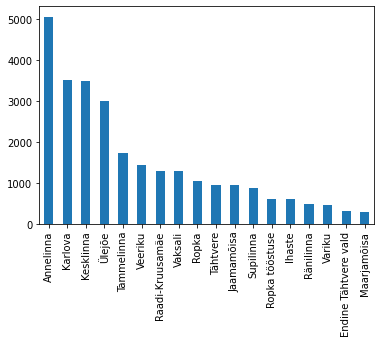

In [87]:
real_home_data["home_district"].value_counts().plot(kind="bar")

In [88]:
all_dest_1_data = data.loc[data["y_destination"] == 1]

<AxesSubplot:>

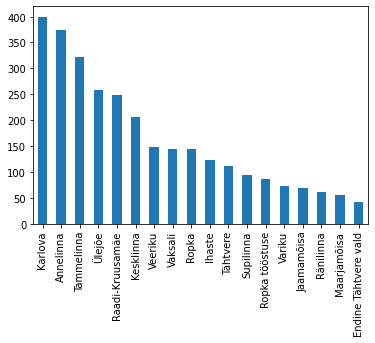

In [89]:
all_dest_1_data["destination_district"].value_counts().plot(kind="bar")

In [90]:
all_dest_0_data = data.loc[data["y_destination"] == 0]

<AxesSubplot:>

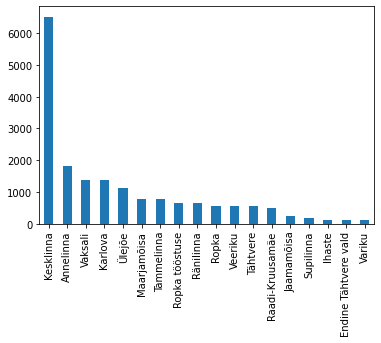

In [91]:
all_dest_0_data["destination_district"].value_counts().plot(kind="bar")

In [92]:
rfc_dest_result = rfc_dest.predict(prediction_dest_X)

In [93]:
rfc_pick_result = rfc_pick.predict(prediction_pick_X)

In [94]:
rfc_dest_result.sum()

1964.0

In [95]:
rfc_pick_result.sum()

3749.0

In [96]:
rfc_dest_prediction_data = prediction_data_dest[rfc_dest_result ==1]

In [97]:
rfc_pick_prediction_data = prediction_data_pick[rfc_pick_result ==1]

<AxesSubplot:>

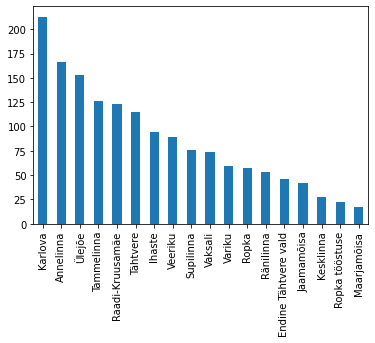

In [98]:
rfc_dest_prediction_data["destination_district"].value_counts().plot(kind="bar")

<AxesSubplot:>

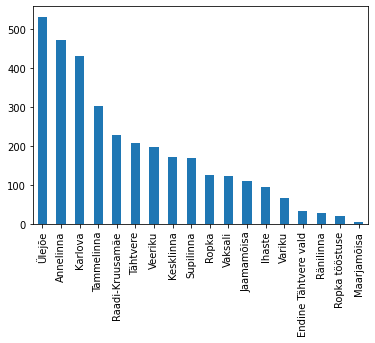

In [99]:
rfc_pick_prediction_data["pickup_district"].value_counts().plot(kind="bar")

In [100]:
rfc_dest_result

array([0., 1., 0., ..., 0., 0., 0.])

In [101]:
rfc_pick_result

array([0., 0., 0., ..., 0., 0., 0.])

In [102]:
data["pred_home_district_dest"] = np.nan

In [103]:
data["pred_home_district_pick"] = np.nan

In [109]:
#Destination: create predicted home district column to prediction data and assign district by destination district
prediction_data_dest.loc[rfc_dest_result == 1, "pred_home_district_dest"] = prediction_data_dest.loc[rfc_dest_result == 1, "destination_district"]

C:\Users\Anne\anaconda3\envs\bolt\lib\site-packages\pandas\core\indexing.py:1743: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


In [110]:
#Pickup: create predicted home district column to prediction data and assign district by pickup district
prediction_data_pick.loc[rfc_pick_result == 1, "pred_home_district_pick"] = prediction_data_pick.loc[rfc_pick_result == 1, "pickup_district"]

In [111]:
#Destination: merge results with DATA
data.loc[prediction_data_dest.index, "pred_home_district_dest"] = prediction_data_dest["pred_home_district_dest"]

In [112]:
#Pickup: merge results with DATA
data.loc[prediction_data_pick.index, "pred_home_district_pick"] = prediction_data_pick["pred_home_district_pick"]

In [113]:
data.count()

Unnamed: 0                 65102
pickup_lat                 65102
pickup_lng                 65102
destination_lat            65074
destination_lng            65071
real_destination_lat       58521
real_destination_lng       58521
finished                   65102
created                    65102
home_address_lat           38682
home_address_lng           38682
work_address_lat           22588
work_address_lng           22588
new_id                     65102
home_district              27296
pickup_district            60152
destination_district       53047
work_district              16578
weekday                    65102
time_window                65102
visit_count_destination    58521
visit_count_pickup         65102
y_pickup                   27819
y_destination              24726
pred_home_district_dest     1552
pred_home_district_pick     3304
dtype: int64

In [114]:
data.to_csv("Bolt_data_predicted_districts.csv")

In [131]:
population_data =  pd.read_csv("Users by district2.csv", sep=',')

In [132]:
population_data.head()

,district,population,bolt_users,predicted_users_destination,predicted_users_pickup,predicted_total,users_total,bolt_users_share,users_total_share,potential_growth_perc,potential_growth_abs
0,Annelinn,24787,980,35,91,126,1106,3.95,4.46,7.95,1971
1,Ihaste,2680,159,28,31,59,218,5.93,8.13,4.28,115
2,Jaamamõisa,3332,173,8,20,28,201,5.19,6.03,6.38,213
3,Kesklinn,6532,603,6,40,46,649,9.23,9.94,2.48,162
4,Karlova,8482,650,41,68,109,759,7.66,8.95,3.47,294


In [133]:
population_data=population_data.rename(columns={"district": "NIMI"})

In [134]:
linnaosad.head()

,NIMI,Shape_STAr,Shape_STLe,geometry
0,Variku,7.604877e+05,4834.921083,"POLYGON ((657744.279 6470571.597, 657726.661 6..."
1,Ropka,1.442172e+06,7924.956724,"POLYGON ((660405.404 6472113.542, 660422.277 6..."
2,Vaksali,6.654457e+05,5366.126655,"POLYGON ((659247.518 6472085.466, 659197.240 6..."
3,Karlova,2.292635e+06,6247.290134,"POLYGON ((659217.520 6473250.669, 659234.870 6..."
4,Tähtvere,2.499984e+06,7181.314925,"POLYGON ((658749.680 6474556.989, 658744.566 6..."


In [135]:
linnaosad["NIMI"] = linnaosad["NIMI"].replace(["Annelinna","Kesklinna","Supilinna", "Tammelinna", "Ränilinna"],["Annelinn", "Kesklinn", "Supilinn", "Tammelinn", "Ränilinn"])

In [136]:
pop_map_data = linnaosad.join(population_data.set_index("NIMI"), on="NIMI")

[]

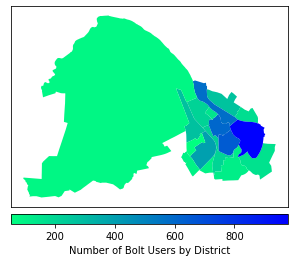

In [198]:
from mpl_toolkits.axes_grid1 import make_axes_locatable
fig, ax = plt.subplots(1, 1)
divider = make_axes_locatable(ax)
cax = divider.append_axes("bottom", size="5%", pad=0.1)
pop_map_data.plot(column = "bolt_users", ax=ax, legend=True, cax=cax, legend_kwds={'label': "Number of Bolt Users by District", 'orientation': "horizontal"}, cmap="winter_r")
ax.set_xticks([])
ax.set_yticks([])

[]

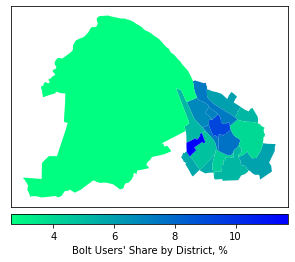

In [201]:
fig, ax = plt.subplots(1, 1)
divider = make_axes_locatable(ax)
cax = divider.append_axes("bottom", size="5%", pad=0.1)
pop_map_data.plot(column = "bolt_users_share", ax=ax, cax=cax, legend=True, legend_kwds={'label': "Bolt Users' Share by District, %", 'orientation': "horizontal"}, cmap="winter_r")
ax.set_xticks([])
ax.set_yticks([])

[]

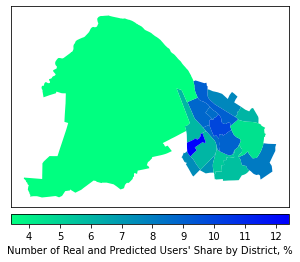

In [202]:
fig, ax = plt.subplots(1, 1)
divider = make_axes_locatable(ax)
cax = divider.append_axes("bottom", size="5%", pad=0.1)
pop_map_data.plot(column = "users_total_share", ax=ax, cax=cax, legend=True, legend_kwds={'label': "Number of Real and Predicted Users' Share by District, %", 'orientation': "horizontal"}, cmap="winter_r")
ax.set_xticks([])
ax.set_yticks([])

[]

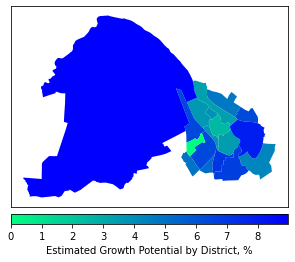

In [196]:
fig, ax = plt.subplots(1, 1)
divider = make_axes_locatable(ax)
cax = divider.append_axes("bottom", size="5%", pad=0.1)
pop_map_data.plot(column = "potential_growth_perc", ax=ax, cax=cax, legend=True, legend_kwds={'label': "Estimated Growth Potential by District, %", 'orientation': "horizontal"}, cmap="winter_r")
ax.set_xticks([])
ax.set_yticks([])

[]

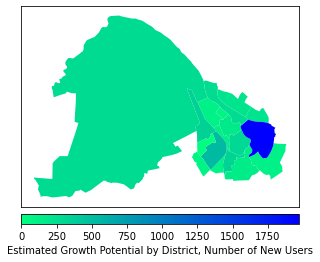

In [205]:
fig, ax = plt.subplots(1, 1)
divider = make_axes_locatable(ax)
cax = divider.append_axes("bottom", size="5%", pad=0.1)
pop_map_data.plot(column = "potential_growth_abs", ax=ax, cax=cax, legend=True, legend_kwds={'label': "Estimated Growth Potential by District, Number of New Users", 'orientation': "horizontal"}, cmap="winter_r")
ax.set_xticks([])
ax.set_yticks([])

[]

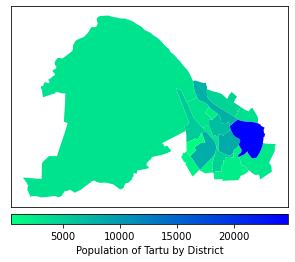

In [206]:
fig, ax = plt.subplots(1, 1)
divider = make_axes_locatable(ax)
cax = divider.append_axes("bottom", size="5%", pad=0.1)
pop_map_data.plot(column = "population", ax=ax, cax=cax, legend=True, legend_kwds={'label': "Population of Tartu by District", 'orientation': "horizontal"}, cmap="winter_r")
ax.set_xticks([])
ax.set_yticks([])

(642853.1200049997, 664711.439895001, 6467726.074500001, 6483492.055500002)

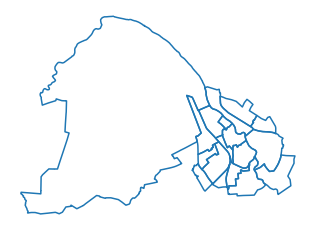

In [221]:
pop_map_data.boundary.plot()
plt.axis("off")